### 4.1.1 数据优化

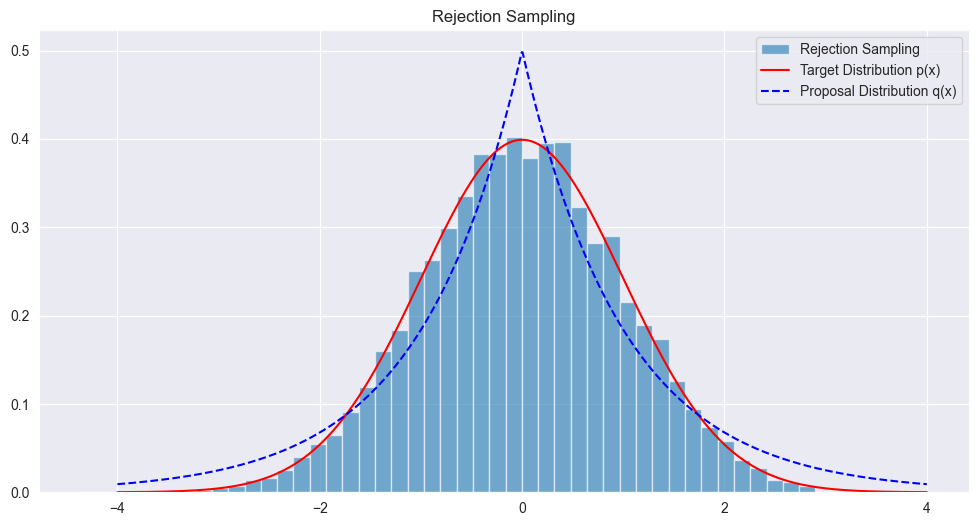

Importance Sampling Estimate for E[x^2]: 1.0068


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标分布 p(x) = (1/sqrt(2*pi)) * exp(-x^2 / 2) (正态分布 PDF)
def p(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# 定义提议分布 q(x) = (1/2) * exp(-|x|) (双边指数分布 PDF)
def q(x):
    return 0.5 * np.exp(-np.abs(x))

# 接受-拒绝采样
def rejection_sampling(num_samples, k):
    samples = []
    while len(samples) < num_samples:
        # 从 q(x) 采样
        x = np.random.laplace(0, 1)  # 双边指数分布
        # 计算接受概率
        acceptance_prob = p(x) / (k * q(x))
        # 从 U(0,1) 中采样 u
        u = np.random.uniform(0, 1)
        if u <= acceptance_prob:
            samples.append(x)
    return np.array(samples)

# 重要性采样
def importance_sampling(num_samples, f):
    # 从 q(x) 中采样
    samples = np.random.laplace(0, 1, num_samples)
    # 计算权重 w(x) = p(x) / q(x)
    weights = p(samples) / q(samples)
    # 计算期望值 E[f(x)]
    weighted_expectation = np.sum(f(samples) * weights) / np.sum(weights)
    return samples, weights, weighted_expectation

# 参数设置
num_samples = 10000
k = np.sqrt(2 * np.e / np.pi)  # 确定常数 k

# 接受-拒绝采样
rejection_samples = rejection_sampling(num_samples, k)

# 重要性采样 (f(x) = x^2)
f = lambda x: x**2
importance_samples, importance_weights, importance_estimate = importance_sampling(num_samples, f)

# 绘制结果
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(12, 6))

# 接受-拒绝采样的分布
plt.hist(rejection_samples, bins=50, density=True, alpha=0.6, label="Rejection Sampling")

# 目标分布
plt.plot(x, p(x), 'r-', label="Target Distribution p(x)")

# 提议分布
plt.plot(x, q(x), 'b--', label="Proposal Distribution q(x)")

plt.title("Rejection Sampling")
plt.legend()
plt.show()

# 输出重要性采样的结果
print(f"Importance Sampling Estimate for E[x^2]: {importance_estimate:.4f}")


#### **问题**
目标是用接受-拒绝采样和重要性采样来近似目标分布 $ p(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2} $ 的性质，其中 $x \in \mathbb{R}$，这是标准正态分布的概率密度函数。

由于 $ p(x) $ 的形式复杂，直接从中采样比较困难，因此我们选择一个容易采样的提议分布 $ q(x) = \frac{1}{2} e^{-|x|} $（双边指数分布，容易采样）。

我们希望通过这两个方法：
1. 从 $ p(x) $ 中生成样本（接受-拒绝采样）。
2. 估计目标分布下的期望 $ \mathbb{E}[f(x)] $，例如 $ f(x) = x^2 $（重要性采样）。

---

### **接受-拒绝采样的步骤**
1. **选取提议分布 $ q(x) $**  
   提议分布 $ q(x) = \frac{1}{2} e^{-|x|} $，其形式简单，支持集 $ x \in \mathbb{R} $ 和 $ p(x) $ 一致。

2. **确定 $ k $**  
   找到一个常数 $ k $ 满足 $ p(x) \leq k \cdot q(x) $ 对所有 $ x $ 都成立：  
   $$
   \frac{p(x)}{q(x)} = \frac{\frac{1}{\sqrt{2\pi}} e^{-x^2}}{\frac{1}{2} e^{-|x|}} = \frac{2}{\sqrt{2\pi}} e^{-|x| + x^2}.
   $$  
   经过分析，取 $ k = \sqrt{2e/\pi} $ 可以满足约束。

3. **采样与接受条件**  
   - 从 $ q(x) $ 中采样一个 $ x $。
   - 计算接受概率 $ \alpha = \frac{p(x)}{kq(x)} = \frac{1}{k} e^{-x^2 + |x|} $。
   - 从 $ U(0, 1) $ 中采样 $ u $，如果 $ u \leq \alpha $，则接受 $ x $，否则拒绝。

4. **重复采样**  
   多次重复以上过程，直到获得 $ N $ 个近似服从 $ p(x) $ 的样本。

---

### **重要性采样的步骤**
1. **选取提议分布 $ q(x) $**  
   提议分布同样为 $ q(x) = \frac{1}{2} e^{-|x|} $。

2. **计算重要性权重**  
   对于从 $ q(x) $ 中采样的 $ x_i $，计算权重：  
   $$
   w(x_i) = \frac{p(x_i)}{q(x_i)} = \frac{\frac{1}{\sqrt{2\pi}} e^{-x_i^2}}{\frac{1}{2} e^{-|x_i|}} = \frac{2}{\sqrt{2\pi}} e^{-|x_i| + x_i^2}.
   $$

3. **估计期望**  
   如果目标是计算 $ \mathbb{E}[f(x)] = \int f(x) p(x) dx $，我们可以用重要性采样估计：  
   $$
   \mathbb{E}[f(x)] \approx \frac{\sum_{i=1}^n f(x_i) w(x_i)}{\sum_{i=1}^n w(x_i)}.
   $$ 
   例如，如果 $ f(x) = x^2 $，则  
   $$
   \mathbb{E}[x^2] \approx \frac{\sum_{i=1}^n x_i^2 w(x_i)}{\sum_{i=1}^n w(x_i)}.
   $$

---

   标准正态分布中，任意偶次幂 $ \mathbb{E}[x^{2n}] $ 的期望值与以下公式相关：
   $$
   \mathbb{E}[x^{2n}] = (2n - 1)!! \cdot \sigma^{2n},
   $$
   其中 $ (2n - 1)!! $ 是双阶乘。

因此，我们可以计算 $ \mathbb{E}[x^2] $ 的真实值：
   $$
   \mathbb{E}[x^2] = 1.
   $$
这与重要性采样的估计值基本一致。



卡方检验的置信区间

In [5]:
import scipy.stats as stats

def chi2_low_up(D):
    lower_bound = stats.chi2.ppf(0.025, D)
    upper_bound = stats.chi2.ppf(0.975, D)
    print(f"D={D}, 2.5%: {lower_bound:.2f}, 97.5%: {upper_bound:.2f}")

# D是自由度，相当于维度
for D in [2, 10, 50, 100, 1000]:
    chi2_low_up(D)


D=2, 2.5%: 0.05, 97.5%: 7.38
D=10, 2.5%: 3.25, 97.5%: 20.48
D=50, 2.5%: 32.36, 97.5%: 71.42
D=100, 2.5%: 74.22, 97.5%: 129.56
D=1000, 2.5%: 914.26, 97.5%: 1089.53


### 4.1.2 降维

E:\Py-Project\DataScience\venv\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
E:\Py-Project\DataScience\venv\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


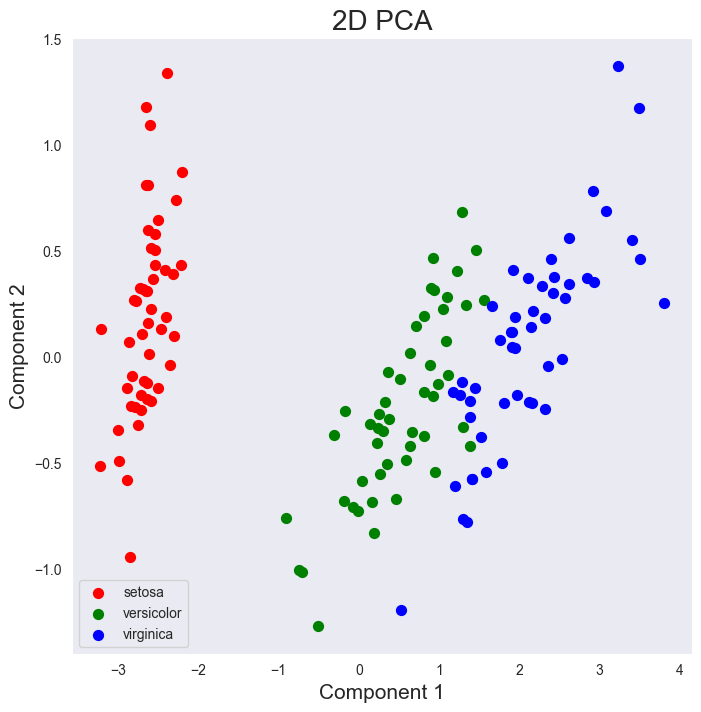

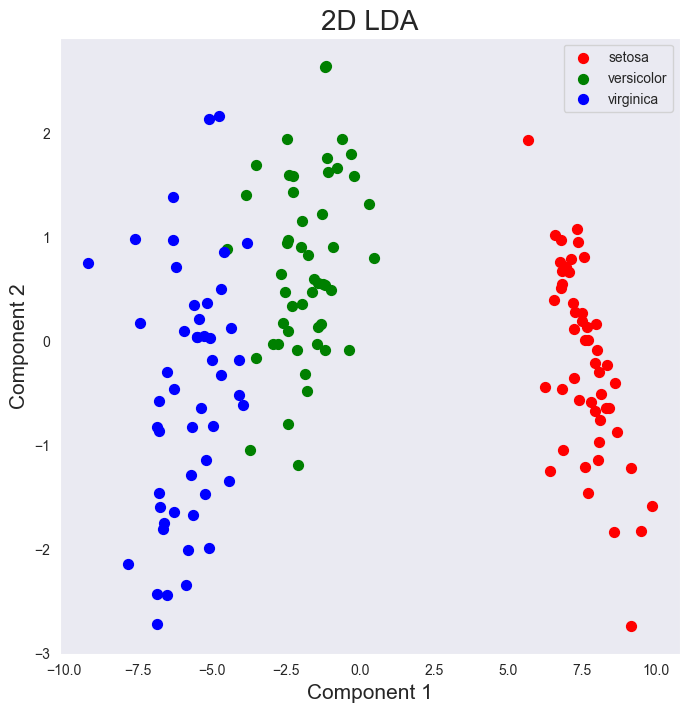

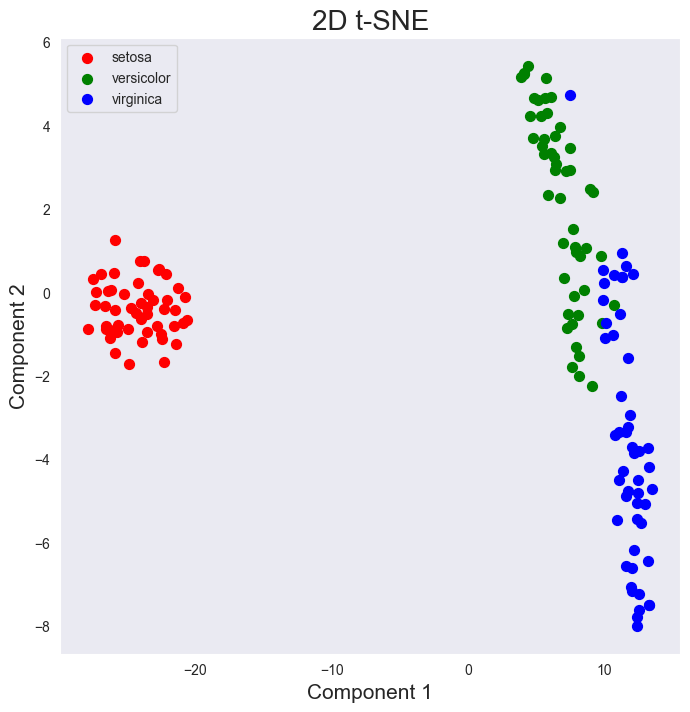

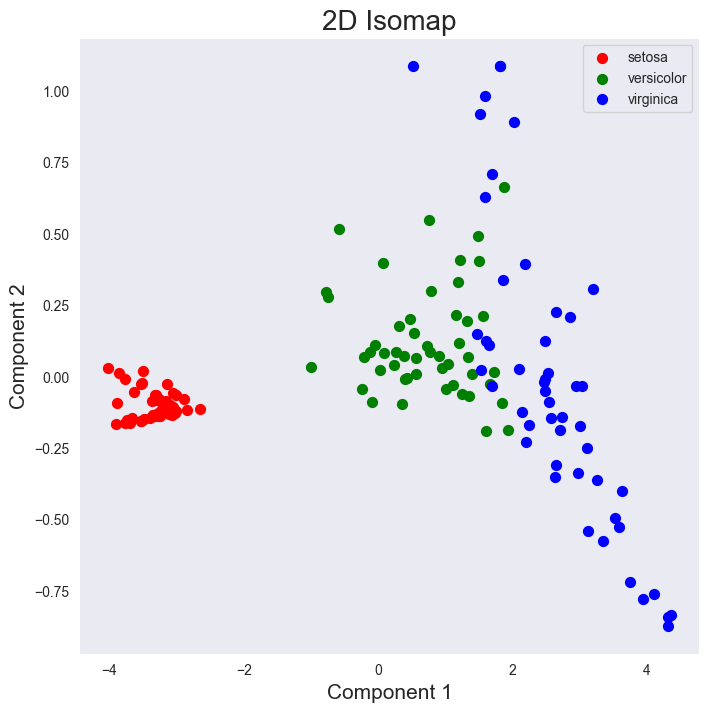

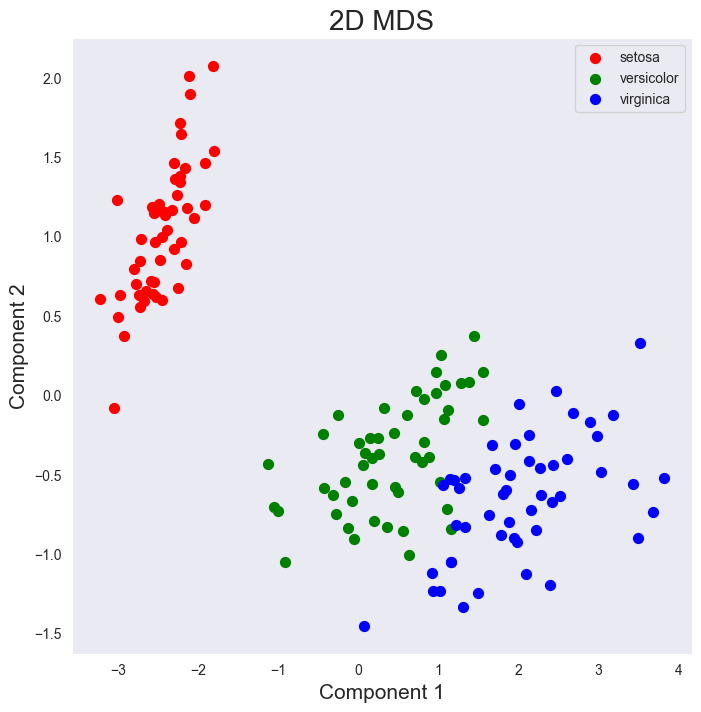

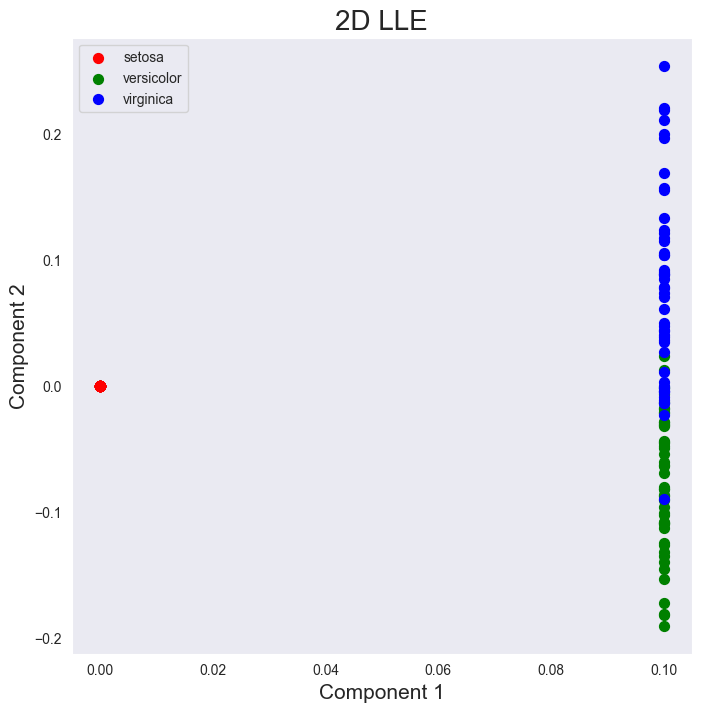

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding as LLE
import matplotlib.pyplot as plt

# 加载 Iris 数据集
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 数据框格式化
data = pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3', 'feature4'])
data['target'] = y

# 可视化函数
def plot_2d(data, title, targets, target_names, xlabel='Component 1', ylabel='Component 2'):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_title(title, fontsize=20)
    colors = ['r', 'g', 'b']
    for target, color, target_name in zip(targets, colors, target_names):
        indices_to_keep = data['target'] == target
        ax.scatter(data.loc[indices_to_keep, 'component1'], 
                   data.loc[indices_to_keep, 'component2'], 
                   c=color, s=50, label=target_name)
    ax.legend()
    ax.grid()
    plt.show()

# 降维函数
def apply_dim_reduction(method, data, labels, n_components=2, **kwargs):
    """
    method: 降维方法对象，例如 PCA(), LDA(), TSNE() 等
    data: 输入特征数据
    labels: 标签数据（仅在 LDA 中使用）
    n_components: 降维到的维度
    kwargs: 降维方法的额外参数
    """
    reducer = method(n_components=n_components, **kwargs)
    if isinstance(method(), LDA):
        reduced = reducer.fit_transform(data, labels)
    else:
        reduced = reducer.fit_transform(data)
    df_reduced = pd.DataFrame(reduced, columns=[f'component{i+1}' for i in range(n_components)])
    df_reduced['target'] = labels
    return df_reduced

# 执行不同的降维方法
pca_result = apply_dim_reduction(PCA, X, y)
lda_result = apply_dim_reduction(LDA, X, y)
tsne_result = apply_dim_reduction(TSNE, X, y)
isomap_result = apply_dim_reduction(Isomap, X, y, n_neighbors=10)
mds_result = apply_dim_reduction(MDS, X, y)
lle_result = apply_dim_reduction(LLE, X, y, n_neighbors=10)

# 可视化降维结果
plot_2d(pca_result, "2D PCA", targets=[0, 1, 2], target_names=target_names)
plot_2d(lda_result, "2D LDA", targets=[0, 1, 2], target_names=target_names)
plot_2d(tsne_result, "2D t-SNE", targets=[0, 1, 2], target_names=target_names)
plot_2d(isomap_result, "2D Isomap", targets=[0, 1, 2], target_names=target_names)
plot_2d(mds_result, "2D MDS", targets=[0, 1, 2], target_names=target_names)
plot_2d(lle_result, "2D LLE", targets=[0, 1, 2], target_names=target_names)
